<img src="img/se4g_pic1.png">

In [1]:
import pandas as pd
from se4g_helper import *
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10
from bokeh.io import output_notebook
import ipywidgets as widgets
from IPython.display import display
from se4g_helper import create_df_from_table, DescriptiveStats

Dropdown(description='Country:', options=('AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'E…

Dropdown(description='Pollutant:', options=(), value=None)

Textarea(value='', description='Statistics:', disabled=True, layout=Layout(height='200px', width='500px'))

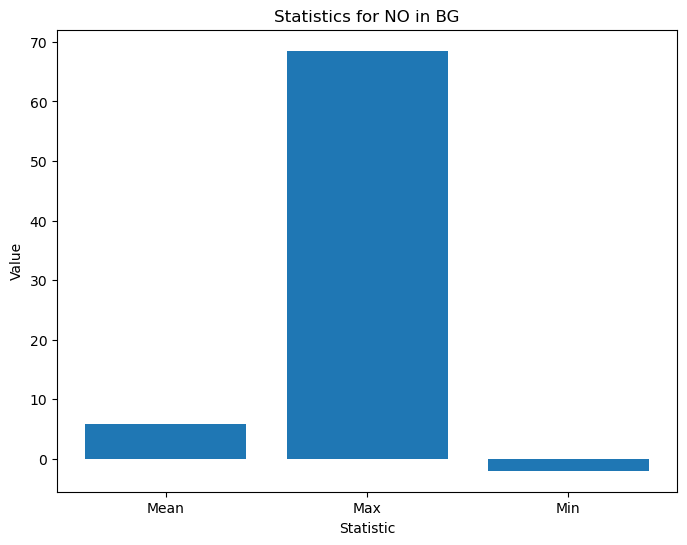

In [2]:
# Usage
stats = DescriptiveStats()

Load dashboard table

In [ ]:
df_pollutant.describe()

In [ ]:
df_station.head()

In [ ]:
df_station.describe()

In [5]:
df_pollutant = create_df_from_table(table_name = 'pollutant_detection')
df_station = create_df_from_table(table_name = 'station')

# Dropdown widgets for country and pollutant selection
country_dropdown = widgets.Dropdown(
    options=create_df_from_table(table_name = 'station')['network_countrycode'].unique(),
    description='Country:'
)

pollutant_dropdown = widgets.Dropdown(
    description='Pollutant:'
)

# Text widget to display statistics
statistics_text = widgets.Textarea(
    description='Statistics:',
    disabled=True,
    layout={'width': '500px', 'height': '200px'}
)

# Function to update pollutants based on selected country
def update_pollutants(change):
    country = country_dropdown.value
    
    if country:
        pollutants = df_pollutant[df_pollutant['station_code'].isin(df_station[df_station['network_countrycode'] == country]['station_code'])]['pollutant'].unique()
        pollutant_dropdown.options = pollutants
        pollutant_dropdown.disabled = False
    else:
        pollutant_dropdown.options = []
        pollutant_dropdown.disabled = True

# Function to update statistics based on user selection
def update_statistics(change):
    country = country_dropdown.value
    pollutant = pollutant_dropdown.value
    
    filtered_df = df_pollutant.merge(df_station, on='station_code')
    filtered_df = filtered_df[(filtered_df['network_countrycode'] == country) & (filtered_df['pollutant'] == pollutant)]
    
    mean_value = filtered_df['value_numeric'].mean()
    max_value = filtered_df['value_numeric'].max()
    min_value = filtered_df['value_numeric'].min()
    
    statistics_text.value = f"Mean: {mean_value:.2f}\nMax: {max_value}\nMin: {min_value}"



def plot_statistics(change):
    country = country_dropdown.value
    pollutant = pollutant_dropdown.value
    
    filtered_df = df_pollutant.merge(df_station, on='station_code')
    filtered_df = filtered_df[(filtered_df['network_countrycode'] == country) & (filtered_df['pollutant'] == pollutant)]
    
    mean_value = filtered_df['value_numeric'].mean()
    max_value = filtered_df['value_numeric'].max()
    min_value = filtered_df['value_numeric'].min()
    
    statistics_text.value = f"Mean: {mean_value:.2f}\nMax: {max_value}\nMin: {min_value}"
    
    # Create a bar plot of the statistics
    stats = [mean_value, max_value, min_value]
    labels = ['Mean', 'Max', 'Min']
    
    plt.figure(figsize=(8, 6))
    plt.bar(labels, stats)
    plt.xlabel('Statistic')
    plt.ylabel('Value')
    plt.title(f'Statistics for {pollutant} in {country}')
    plt.show()



Dropdown(description='Country:', options=('AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'E…

Dropdown(description='Pollutant:', options=(), value=None)

Textarea(value='', description='Statistics:', disabled=True, layout=Layout(height='200px', width='500px'))

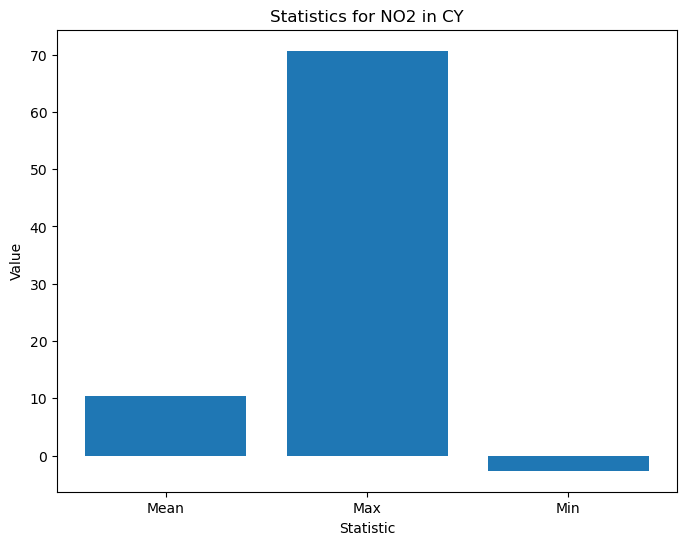

In [7]:
class DescriptiveStats:
    def __init__(self):
        self.df_pollutant = create_df_from_table(table_name='pollutant_detection')
        self.df_station = create_df_from_table(table_name='station')
        
        # Dropdown widgets for country and pollutant selection
        self.country_dropdown = widgets.Dropdown(
            options=self.df_station['network_countrycode'].unique(),
            description='Country:'
        )

        self.pollutant_dropdown = widgets.Dropdown(
            description='Pollutant:'
        )

        # Text widget to display statistics
        self.statistics_text = widgets.Textarea(
            description='Statistics:',
            disabled=True,
            layout={'width': '500px', 'height': '200px'}
        )

        # Event listeners for dropdown selection
        self.country_dropdown.observe(self.update_pollutants, 'value')
        self.pollutant_dropdown.observe(self.update_statistics, 'value')

        # Display widgets
        display(self.country_dropdown)
        display(self.pollutant_dropdown)
        display(self.statistics_text)

    def create_df_from_table(self, table_name):
        # Implementation to create DataFrame from table
        # ...
        pass

    def update_pollutants(self, change):
        country = self.country_dropdown.value

        if country:
            pollutants = self.df_pollutant[self.df_pollutant['station_code'].isin(
                self.df_station[self.df_station['network_countrycode'] == country]['station_code'])]['pollutant'].unique()
            self.pollutant_dropdown.options = pollutants
            self.pollutant_dropdown.disabled = False
        else:
            self.pollutant_dropdown.options = []
            self.pollutant_dropdown.disabled = True

    def update_statistics(self, change):
        country = self.country_dropdown.value
        pollutant = self.pollutant_dropdown.value

        filtered_df = self.df_pollutant.merge(self.df_station, on='station_code')
        filtered_df = filtered_df[(filtered_df['network_countrycode'] == country) & (filtered_df['pollutant'] == pollutant)]

        mean_value = filtered_df['value_numeric'].mean()
        max_value = filtered_df['value_numeric'].max()
        min_value = filtered_df['value_numeric'].min()

        self.statistics_text.value = f"Mean: {mean_value:.2f}\nMax: {max_value}\nMin: {min_value}"

        # Update the plot
        self.plot_statistics()

    def plot_statistics(self):
        country = self.country_dropdown.value
        pollutant = self.pollutant_dropdown.value

        filtered_df = self.df_pollutant.merge(self.df_station, on='station_code')
        filtered_df = filtered_df[(filtered_df['network_countrycode'] == country) & (filtered_df['pollutant'] == pollutant)]

        mean_value = filtered_df['value_numeric'].mean()
        max_value = filtered_df['value_numeric'].max()
        min_value = filtered_df['value_numeric'].min()

        self.statistics_text.value = f"Mean: {mean_value:.2f}\nMax: {max_value}\nMin: {min_value}"

        # Create a bar plot of the statistics
        stats = [mean_value, max_value, min_value]
        labels = ['Mean', 'Max', 'Min']

        plt.figure(figsize=(8, 6))
        plt.bar(labels, stats)
        plt.xlabel('Statistic')
        plt.ylabel('Value')
        plt.title(f'Statistics for {pollutant} in {country}')
        plt.show()

# Usage
stats = DescriptiveStats()


## OTHER MAP

In [1]:
from se4g_helper import Interactive

# Example usage
selected_pollutant = Interactive().select_pollutant()
selected_date = Interactive().select_date()

Dropdown(description='Select pollutant:', layout=Layout(width='250px'), options=('CO', 'NO', 'NO2', 'PM10', 'S…

Dropdown(description='Select date:', layout=Layout(width='250px'), options=(datetime.date(2023, 5, 30), dateti…

In [3]:
Interactive().create_bokeh_plot(selected_pollutant.value, selected_date.value)

Loading BokehJS ...

In [3]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
from se4g_helper import create_df_from_table

class Interactive:
    def __init__(self, 
                    df_pollutant=create_df_from_table(table_name = 'pollutant_detection'), 
                    df_station=create_df_from_table(table_name = 'station')):
        self.df_pollutant = df_pollutant
        self.df_station = df_station

    def select_pollutant(self):
        pollutants = self.df_pollutant['pollutant'].unique()
        dropdown_pollutant = widgets.Dropdown(
            options=pollutants,
            description='Select pollutant:',
            layout=widgets.Layout(width='250px'),
            style={'description_width': 'initial', 'min-width': '250px', 'font-size': '10pt'}
        )
        display(dropdown_pollutant)
        return dropdown_pollutant

    def select_date(self):
        self.df_pollutant['value_datetime_begin'] = pd.to_datetime(self.df_pollutant['value_datetime_begin'])
        dates = self.df_pollutant['value_datetime_begin'].dt.date.unique()
        dropdown_date = widgets.Dropdown(
            options=dates,
            description='Select date:',
            layout=widgets.Layout(width='250px'),
            style={'description_width': 'initial', 'min-width': '250px', 'font-size': '10pt'}
        )
        display(dropdown_date)
        return dropdown_date

    def create_bokeh_plot(self, selected_pollutant, selected_date):
        df_selected = self.df_pollutant[
            (self.df_pollutant['pollutant'] == selected_pollutant) &
            (self.df_pollutant['value_datetime_begin'].dt.date == selected_date)
        ]

        # Merge the station and df_pollutant DataFrames on station_code
        df_country = pd.merge(self.df_station, df_selected, on='station_code')

        countries = df_country['network_countrycode'].unique()
        colors = Category10[10][:len(countries)]

        p = figure(x_axis_type='datetime', title=f"Pollutant: {selected_pollutant} - Date: {selected_date}",
                   width=800, height=400)

        for country, color in zip(countries, colors):
            df_filtered = df_country[df_country['network_countrycode'] == country]
            df_filtered = df_filtered.sort_values('value_datetime_begin')  # Sort by 'value_datetime_begin'
            source = ColumnDataSource(df_filtered)
            p.line(x='value_datetime_begin', y='value_numeric', source=source, line_color=color,
                   legend_label=country)

        p.legend.location = "top_left"
        p.legend.click_policy = "hide"

        output_notebook()
        show(p)

# Example usage
dashboard = Interactive()
selected_pollutant = dashboard.select_pollutant()
selected_date = dashboard.select_date()


Dropdown(description='Select pollutant:', layout=Layout(width='250px'), options=('CO', 'NO', 'NO2', 'PM10', 'S…

Dropdown(description='Select date:', layout=Layout(width='250px'), options=(datetime.date(2023, 5, 30), dateti…

In [5]:

dashboard.create_bokeh_plot(selected_pollutant.value, selected_date.value)

Loading BokehJS ...

In [18]:
#DAILY POLLUTION OF ! POLLUTANT IN DIFFERENT CITIES--> DA TENERE
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

def select_pollutant(df_pollutant):
    pollutants = df_pollutant['pollutant'].unique()
    dropdown_pollutant = widgets.Dropdown(
        options=pollutants,
        description='Select pollutant:',
        layout=widgets.Layout(width='250px'),
        style={'description_width': 'initial', 'min-width': '250px', 'font-size': '10pt'}
    )
    display(dropdown_pollutant)
    return dropdown_pollutant

def select_date(df_pollutant):
    df_pollutant['value_datetime_begin'] = pd.to_datetime(df_pollutant['value_datetime_begin'])
    dates = df_pollutant['value_datetime_begin'].dt.date.unique()
    dropdown_date = widgets.Dropdown(
        options=dates,
        description='Select date:',
        layout=widgets.Layout(width='250px'),
        style={'description_width': 'initial', 'min-width': '250px', 'font-size': '10pt'}
    )
    display(dropdown_date)
    return dropdown_date

# Example usage
selected_pollutant = select_pollutant(df_pollutant)
selected_date = select_date(df_pollutant)


#DAILY POLLUTION OF ! POLLUTANT IN DIFFERENT CITIES---> da tenere 
# Funzione per creare il grafico Bokeh
def create_bokeh_plot(df_pollutant, station, selected_pollutant, selected_date):
    df_selected = df_pollutant[(df_pollutant['pollutant'] == selected_pollutant) &
                               (df_pollutant['value_datetime_begin'].dt.date == selected_date)]
    
    # Merge the station and df_pollutant DataFrames on station_code
    df_country = pd.merge(station, df_selected, on='station_code')
    
    countries = df_country['network_countrycode'].unique()
    colors = Category10[10][:len(countries)]

    p = figure(x_axis_type='datetime', title=f"Pollutant: {selected_pollutant} - Date: {selected_date}",
               width=800, height=400)

    for country, color in zip(countries, colors):
        df_filtered = df_country[df_country['network_countrycode'] == country]
        df_filtered = df_filtered.sort_values('value_datetime_begin')  # Sort by 'value_datetime_begin'
        source = ColumnDataSource(df_filtered)
        p.line(x='value_datetime_begin', y='value_numeric', source=source, line_color=color,
               legend_label=country)

    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    output_notebook()
    show(p)


create_bokeh_plot(df_pollutant, df_station, selected_pollutant.value, selected_date.value)




Dropdown(description='Select pollutant:', layout=Layout(width='250px'), options=('CO', 'NO', 'NO2', 'PM10', 'S…

Dropdown(description='Select date:', layout=Layout(width='250px'), options=(datetime.date(2023, 5, 30), dateti…

In [19]:
#DAILY POLLUTION OF ! POLLUTANT IN DIFFERENT CITIES---> da tenere 
# Funzione per creare il grafico Bokeh
def create_bokeh_plot(df_pollutant, station, selected_pollutant, selected_date):
    df_selected = df_pollutant[(df_pollutant['pollutant'] == selected_pollutant) &
                               (df_pollutant['value_datetime_begin'].dt.date == selected_date)]
    
    # Merge the station and df_pollutant DataFrames on station_code
    df_country = pd.merge(station, df_selected, on='station_code')
    
    countries = df_country['network_countrycode'].unique()
    colors = Category10[10][:len(countries)]

    p = figure(x_axis_type='datetime', title=f"Pollutant: {selected_pollutant} - Date: {selected_date}",
               width=800, height=400)

    for country, color in zip(countries, colors):
        df_filtered = df_country[df_country['network_countrycode'] == country]
        df_filtered = df_filtered.sort_values('value_datetime_begin')  # Sort by 'value_datetime_begin'
        source = ColumnDataSource(df_filtered)
        p.line(x='value_datetime_begin', y='value_numeric', source=source, line_color=color,
               legend_label=country)

    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    output_notebook()
    show(p)


create_bokeh_plot(df_pollutant, df_station, selected_pollutant.value, selected_date.value)



Loading BokehJS ...

# Plot 2 Bokeh - add button to select station


# Example usage
selected_pollutant = select_pollutant(df_pollutant)
df_select_poll = df_pollutant[df_pollutant['pollutant'] == selected_pollutant.value]

selected_date = select_date(df_select_poll)
df_selected = df_select_poll[df_select_poll['value_datetime_begin'].dt.date == selected_date.value]

# Merge
df_stations = pd.merge(df_station, df_selected, on='station_code')
#print(df_country)

selected_country = select_country(df_stations)
df_selected = df_stations[(df_stations['network_countrycode'] == selected_country.value)]


def create_bokeh_plot_country(df_selected=df_selected):

    stations = df_selected['station_name'].unique()
    colors = Category10[10][:len(stations)]

    p = figure(x_axis_type='datetime', title=f"Pollutant: {selected_pollutant} - Date: {selected_date} - Country: {selected_country}",
               width=800, height=400)
    print(stations)
    for stazione, color in zip(stations, colors):
        df_filtered = df_selected[df_selected['station_name'] == stazione]
        df_filtered = df_filtered.sort_values('value_datetime_begin')  # Sort by 'value_datetime_begin'
        source = ColumnDataSource(df_filtered)
        p.line(x='value_datetime_begin', y='value_numeric', source=source, line_color=color,
               legend_label=stazione)

    #print(df_filtered[['value_datetime_begin','value_numeric']])
    #print(df_filtered)
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    output_notebook()
    show(p)

## da qui in poi è correlogram?

In [3]:
# Input CSV data 
df = pd.read_csv('C:/Users/Hp/OneDrive - Politecnico di Milano/Desktop/prova_se4g/output/New_out.csv',encoding='unicode_escape')

In [6]:
df.columns =['network_countrycode', 'network_localid', 'network_name', 'network_namespace','network_timezone','pollutant','samplingpoint_localid','samplingpoint_namespace',
'samplingpoint_x','samplingpoint_y','coordsys','station_code','station_localid','station_name','station_namespace',
'value_datetime_begin','value_datetime_end','value_datetime_inserted','value_datetime_updated','value_numeric','value_validity','value_verification','station_altitude','value_unit']

Dropdown(description='Pollutant 1:', options=('CO', 'NO', 'NO2', 'PM10', 'SO2', nan), value='CO')

Dropdown(description='Pollutant 2:', options=('CO', 'NO', 'NO2', 'PM10', 'SO2', nan), value='CO')

DatePicker(value=None, description='Select Date:', step=1)

Button(description='Update Scatterplot', style=ButtonStyle())

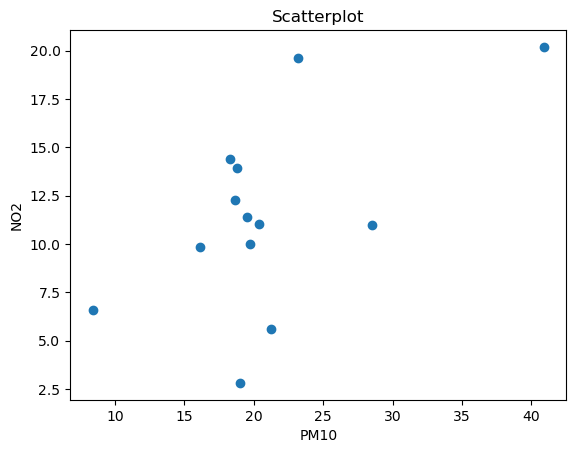

In [8]:
#CORRELOGRAM DA TENERE--> the user select 2 pollutant and a day, and it is shows the correlation between the mean daily pollution in every city for the 2 pollutants 
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
#RE--> the dataframe df is the big dataframe --> SOSTITUIRE DF CON NOME DATAFRAME 

# Convert 'value_datetime_begin' column to datetime data type
df['value_datetime_begin'] = pd.to_datetime(df['value_datetime_begin'])

# Create dropdown widgets for selecting pollutants and a date
pollutant_dropdown1 = widgets.Dropdown(options=df['pollutant'].unique(), description='Pollutant 1:')
pollutant_dropdown2 = widgets.Dropdown(options=df['pollutant'].unique(), description='Pollutant 2:')
date_picker = widgets.DatePicker(description='Select Date:')


# Define a function to update the scatterplot based on the selected values
def update_scatterplot(b):
    selected_date = date_picker.value.strftime('%Y-%m-%d')
    selected_pollutant1 = pollutant_dropdown1.value
    selected_pollutant2 = pollutant_dropdown2.value

    # Filter the DataFrame based on the selected date and pollutants
    filtered_df = df[(df['value_datetime_begin'].dt.date == pd.to_datetime(selected_date).date()) &
                       (df['pollutant'].isin([selected_pollutant1, selected_pollutant2]))]

    # Calculate the daily mean of each pollutant in each city
    mean_df = filtered_df.groupby(['network_countrycode', 'pollutant'])['value_numeric'].mean().reset_index()

    # Pivot the DataFrame to have pollutants as columns
    pivot_df = mean_df.pivot(index='network_countrycode', columns='pollutant', values='value_numeric')
    
    # Check if the selected pollutants exist in the DataFrame
    if selected_pollutant1 not in pivot_df.columns or selected_pollutant2 not in pivot_df.columns:
        print("Selected pollutants not found in the data.")
        return

    # Get the values for the selected pollutants
    x_values = pivot_df[selected_pollutant1].values
    y_values = pivot_df[selected_pollutant2].values

    # Create the scatterplot
    plt.scatter(x_values, y_values)
    plt.xlabel(selected_pollutant1)
    plt.ylabel(selected_pollutant2)
    plt.title('Scatterplot')

    # Display the plot
    plt.show()

# Add an event handler to trigger the update when the button is clicked
button = widgets.Button(description='Update Scatterplot')
button.on_click(update_scatterplot)

# Display the widgets
display(pollutant_dropdown1, pollutant_dropdown2, date_picker, button)



<img src="img/se4g_pic2.png">